# Домашнее задание 2

В этом задании:

1. Сделаем регрессию над данными через scikit-learn: сначала через регресию, потом через бустинг.
2. Сравним результаты с константным предсказанием.
3. Сделаем нейронную сеть на полносвязных слоях, обучим над теми же данными - и сравним с лин. регрессией и бустингом.



In [37]:
import pandas as pd
import numpy as np
import random
import torch, tqdm as tqdm

# Для воспроизводимости
seed = 0
np.random.seed(seed)
random.seed(seed)

In [38]:
df = pd.read_csv("insurance.csv")

### Задание №1:
Cделайте train/test split на данных в пропорции 0.2/0.8, залейте в лмс код, который в `df_train`, `df_test`
сохранит датафрейм с тренировочными и тестовыми данными соответственно.

P.S Использовать train_test_split из scikit-learn запрещено - разбивайте вручную через индексы.

In [40]:
df.shape[0]

1338

In [32]:
ratio = int(df.shape[0]*0.8)
ratio

1070

In [34]:
len(df[:ratio])

1070

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
ratio = int(df.shape[0]*0.8)
df_train = df[:ratio]
df_test = df[ratio:]

In [37]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
1070,37,male,37.070,1,yes,southeast,39871.70430
1071,63,male,31.445,0,no,northeast,13974.45555
1072,21,male,31.255,0,no,northwest,1909.52745
1073,54,female,28.880,2,no,northeast,12096.65120
1074,60,female,18.335,0,no,northeast,13204.28565


### Задание №2:
Сделайте `OHE` на колонки sex, region, smoker.

Нужно сделать как на train, так и на test датасете.
Считайте, что исходные датафреймы сохранены в `df_train` и `df_test`.
При этом в `df_train`, `df_test` должны остаться старые колонки - т.е. его нужно обогатить.


In [60]:
from typing import List


def add_ohe(df : pd.DataFrame, col_list : List[str]):
    for col_ in col_list:
        unique_values = df[col_].unique().tolist()
        for v in unique_values:
            df[col_+'_'+v] = (df[col_] == v).astype(int)

In [61]:
add_ohe(df, ['sex', 'region', 'smoker'])
df

,age,sex,bmi,children,smoker,region,charges,sex_ohe,region_ohe,smoker_ohe,sex_female,sex_male,region_southwest,region_southeast,region_northwest,region_northeast,smoker_yes,smoker_no
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0,1,0,1,0,0,0,1,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1,0,1,0,1,0,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1,0,1,0,1,0,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,1,2,1,0,1,0,0,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,2,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,2,1,0,1,0,0,1,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,3,1,1,0,0,0,0,1,0,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1,1,0,0,1,0,0,0,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,1,1,0,1,0,0,0,0,1


In [ ]:
...

print(df_train.columns)
print(df_train.columns)

### Задание №4:
Нормализуйте колонки, которые вы отметили в квизе.
Считайте, что исходные датафреймы сохранены в `df_train` и `df_test`.

Сдайте код, который модифицирует `df_train` и `df_test` так, чтобы численные колонки из прошлого пункта стали нормированы.

In [10]:
from typing import List

def normalizer(df_train : pd.DataFrame, df_test : pd.DataFrame, col_list : List[str]):
    for col_ in col_list:
        mean = df_train[col_].mean()
        std = df_train[col_].std()
        df_train[col_] = (df_train[col_] - mean) / std
        df_test[col_] = (df_test[col_] - mean) / std
        


In [9]:
normalizer(df_train, df_test, ['bmi', 'charges', 'age'])

NameError: name 'df_train' is not defined

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438227,female,-0.453151,0,yes,southwest,0.298472
1,-1.509401,male,0.509431,1,no,southeast,-0.953333
2,-0.797655,male,0.383164,3,no,southeast,-0.728402
3,-0.441782,male,-1.305043,0,no,northwest,0.719574
4,-0.512957,male,-0.292447,0,no,northwest,-0.776512


In [ ]:
y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

### Задание №5
Реализуйте функцию, считающую `MSE` метрику.

Ваша функция должна уметь принимать torch.Tensor, numpy-массивы и pd.Series.

In [22]:
def mse_metric(y_true, y_pred):
    # Вычисление MSE
    mse = ((y_true - y_pred) ** 2).mean()
    return mse

In [25]:
# y_true = np.array([1.0, 2.0, 3.0])
# y_pred = np.array([1.5, 2.5, 3.5])

# y_true = torch.tensor([1.0, 2.0, 3.0])
# y_pred = torch.tensor([1.5, 2.5, 3.5])

y_true = pd.Series([1.0, 2.0, 3.0])
y_pred = pd.Series([1.5, 2.5, 3.5])

# y_true = [1.0, 2.0, 3.0]
# y_pred = [1.5, 2.5, 3.5]

print(mse_metric(y_true, y_pred))

0.25


### Задание №6
Реализуйте бейзлайн на `LinearRegression` и `GradientBoostingRegressor`, отправьте метрики в ЛМС.

Используйте гиперпараметры по-умолчанию в обоих моделях.

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

In [39]:
import pandas as pd
import numpy as np
import random

seed = 0
np.random.seed(seed)
random.seed(seed)

df = pd.read_csv("insurance.csv")

idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

df_train = pd.get_dummies(df_train, columns=["sex", "region", "smoker"])
df_test = pd.get_dummies(df_test, columns=["sex", "region", "smoker"])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df_train[['age', 'bmi', 'children', 'charges']])
df_test[['age', 'bmi', 'children', 'charges']] = scaler.transform(df_test[['age', 'bmi', 'children', 'charges']])

y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

def metric(preds, y):
    return ((preds - y) ** 2).mean()

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(df_train, y_train)
y_pred_linreg = linreg.predict(df_test)
mse_linreg = metric(y_pred_linreg, y_test)

gradboost = GradientBoostingRegressor()
gradboost.fit(df_train, y_train)
y_pred_gradboost = gradboost.predict(df_test)
mse_gradboost = metric(y_pred_gradboost, y_test)

In [32]:
print(mse_linreg)
print(mse_gradboost)

0.22302419633942042
0.11499598580020744


### Задание №7
Вычислите среднее значение целевой переменной на тренировочной выборке (train).

Подсчитайте MSE при константном предсказании этим средним и отправьте его в ЛМС.

In [33]:
mean_train = y_train.mean()

In [35]:
metric(mean_train, y_test)

1.1155505928744722

### Задание №8
Создайте сеть, состоящую из одного слоя Linear, залейте в лмс код, который в `model` запишет вашу модель

В качестве признаков используйте все колонки в текущем датасете, за исключением таргета

In [36]:
df_train

,age,bmi,children,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,-1.427758,-0.456469,-0.893045,True,False,False,False,False,True,False,True
2,-0.788401,0.368324,1.584808,False,True,False,False,True,False,True,False
3,-0.433203,-1.296627,-0.893045,False,True,False,True,False,False,True,False
4,-0.504242,-0.297980,-0.893045,False,True,False,True,False,False,True,False
6,0.490313,0.439483,-0.067094,True,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.916551,2.260499,1.584808,True,False,False,False,False,True,True,False
1333,0.774472,0.040024,1.584808,False,True,False,True,False,False,True,False
1334,-1.498797,0.193662,-0.893045,True,False,True,False,False,False,True,False
1336,-1.285679,-0.796090,-0.893045,True,False,False,False,False,True,True,False


In [11]:
import torch.nn as nn


def build_model():
    # Полносвязный слой
    # return nn.Linear(11, 1)

    return  nn.Sequential(
            # Теперь на вход приходит другое число фичей
            nn.Linear(in_features=11, out_features=6),
            nn.ReLU(),
            nn.Linear(in_features=6, out_features=6),
            nn.Linear(in_features=6, out_features=6),
            # Единственное отличие: out_features=1, предсказываем 1 число - наш таргет
            nn.Linear(in_features=6, out_features=1),
            # Предсказываем число в произвольном диапазоне, поэтому нелинейность убираем
            # self.act_2 = nn.Softmax(dim=1)
        )


model = build_model()

In [47]:
import torch

torch.random.manual_seed(seed)
t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32)

In [53]:
t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

In [62]:
t_y_test

tensor([-2.9019e-01, -3.8852e-01,  2.7158e+00, -2.0692e-02, -2.9690e-01,
        -7.2669e-01, -9.1904e-01, -1.4714e-01, -4.7295e-01, -6.4943e-01,
        -5.3847e-01, -2.2591e-01, -4.8962e-01, -7.5303e-01,  4.2721e-01,
        -2.0847e-01, -5.6325e-02, -8.1106e-01, -5.6314e-01,  1.6943e+00,
         8.9983e-01, -4.6317e-02,  8.2281e-01,  8.2447e-01, -9.6278e-01,
        -7.1271e-01, -7.9083e-01, -4.6080e-01, -7.8883e-01, -3.9974e-01,
        -4.2930e-01,  2.9889e+00, -1.8245e-02,  6.2101e-01,  1.1482e-01,
        -7.5700e-01, -4.0528e-01,  3.1747e+00,  2.2397e+00, -9.4559e-01,
        -6.4667e-01, -8.6315e-01,  5.8082e-01,  2.8658e+00,  1.9177e+00,
         1.0712e+00,  5.4741e-01, -5.2277e-01, -7.0849e-01,  7.5153e-01,
        -8.6044e-01,  4.7132e-01,  8.6649e-01,  2.7620e+00,  9.2155e-01,
        -8.2958e-01, -9.0864e-01, -3.6517e-01,  1.0700e-01, -7.1122e-03,
        -9.9794e-01,  2.8007e+00,  6.0333e-02, -2.9806e-01, -2.0561e-01,
        -2.7720e-01,  1.6168e+00,  2.1347e+00, -8.3

### Задание №9
Напишите функцию `train_loop`, которая будет учить модель по данным на 2к итераций.
Считайте, что данные уже хранятся в переменных `t_x_train`, `t_y_train`.
Ваша функция `train_loop` должна вернуть список из лоссов на каждой итерации (т.е. список длины 2000).

Используйте `learning_rate=1e-2` в оптимизаторе.

Для простоты за одну итерацию делайте проход вперед и проход назад на всех наших обучающих данных.
Это будет полный градиентный спуск (не по батчам) - можем себе позволить, данных немного.

_Подсказка 1_: Вам не обязательно учить модель на видеокарте, CPU будет достаточно.

_Подсказка 2_: `tqdm` - это библиотека, которая рисует прогресс итераций

In [12]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

import random


seed = 0
np.random.seed(seed)
random.seed(seed)


df = pd.read_csv("insurance.csv")

idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

df_train = pd.get_dummies(df_train, columns=["sex", "region", "smoker"])
df_test = pd.get_dummies(df_test, columns=["sex", "region", "smoker"])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[['age', 'bmi', 'children', 'charges']] = scaler.fit_transform(df_train[['age', 'bmi', 'children', 'charges']])
df_test[['age', 'bmi', 'children', 'charges']] = scaler.transform(df_test[['age', 'bmi', 'children', 'charges']])

y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

def metric(preds, y):
    return ((preds - y) ** 2).mean()

t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.unsqueeze(torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32), dim=1)

print(f't_x_train.shape: {t_x_train.shape}')
print(f't_y_train.shape: {t_y_train.shape}')


t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

class SimpleLinearModel(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, hidden_dim: int):
        super(SimpleLinearModel, self).__init__()
        # self.linear = nn.Linear(input_dim, output_dim)
        self.linear = nn.Sequential(
            # Теперь на вход приходит другое число фичей
            nn.Linear(in_features=input_dim, out_features=hidden_dim),
            nn.ReLU(),
            nn.Linear(in_features=hidden_dim, out_features=hidden_dim),
            nn.Linear(in_features=hidden_dim, out_features=hidden_dim),
            # Единственное отличие: out_features=1, предсказываем 1 число - наш таргет
            nn.Linear(in_features=hidden_dim, out_features=output_dim),
            # Предсказываем число в произвольном диапазоне, поэтому нелинейность убираем
            # self.act_2 = nn.Softmax(dim=1)
        )
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

def train_loop(model: nn.Module, t_x_train: torch.Tensor, t_y_train: torch.Tensor, 
               num_epochs: int = 2000, learning_rate: float = 0.01) -> list[float]:
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    losses = []
    
    for epoch in tqdm(range(num_epochs), desc="Training Epochs"):
        # Forward pass
        predictions = model(t_x_train)
        loss = criterion(predictions, t_y_train)
        losses.append(loss.item())
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return losses

model = SimpleLinearModel(input_dim=11, output_dim=1, hidden_dim=6)
losses = train_loop(model, t_x_train, t_y_train)

with torch.no_grad():
    out = model(t_x_test).squeeze(1)
    mse_loss = metric(out, t_y_test)
    print(mse_loss.item())

t_x_train.shape: torch.Size([1071, 11])
t_y_train.shape: torch.Size([1071, 1])


Training Epochs: 100%|██████████| 2000/2000 [00:03<00:00, 556.63it/s]

0.13296163082122803


In [67]:
with torch.no_grad():
    out = model(t_x_test).squeeze(1)
    mse_loss = metric(out, t_y_test)
    print(mse_loss.item())

1.115551471710205


In [48]:
t_x_train.shape

torch.Size([1071, 11])

In [49]:
# t_x_train = torch.randn(100, 10)
# t_y_train = torch.randn(100, 1)
model = SimpleLinearModel(input_dim=11, output_dim=1)
losses = train_loop(model, t_x_train, t_y_train)

Training Epochs:   0%|          | 0/2000 [00:00<?, ?it/s]/Users/theo/karpov/nlp/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1071])) that is different to the input size (torch.Size([1071, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Training Epochs: 100%|██████████| 2000/2000 [00:03<00:00, 577.77it/s]


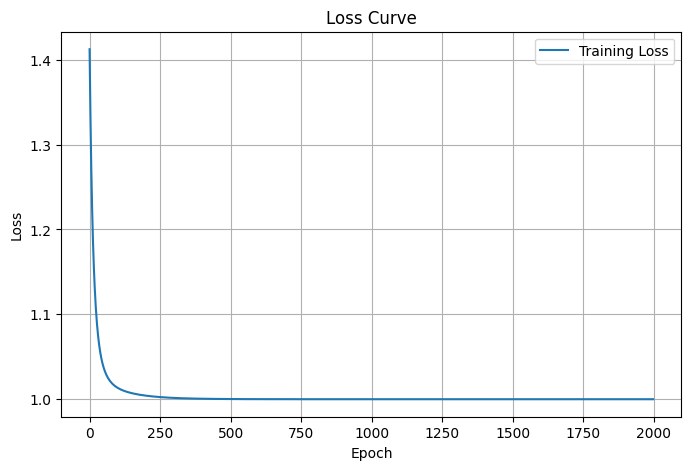

In [66]:
import matplotlib.pyplot as plt

# После вызова train_loop, у вас есть список losses:
# losses = train_loop(model, t_x_train, t_y_train)

# Построение графика
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import tqdm
from torch.optim.sgd import SGD


def train_loop(model: nn.Module) -> list[float]:
    losses = []
    ...
    return losses

### Задание №10
Обучите модель, состоящую из одного слоя `Linear`.
Приложите в ЛМС метрику `MSE` на тестовых данных.
Используйте `learning_rate=1e-2` в оптимизаторе.

Когда будете тестировать, не забудьте перенести тестовые данные в `torch.Tensor`

In [63]:
out = model(t_x_test)
out

tensor([[-3.5893e-06],
        [ 1.7669e-05],
        [-2.4481e-05],
        [-1.4162e-05],
        [-1.9334e-06],
        [ 5.2713e-06],
        [ 2.4363e-06],
        [-1.1448e-05],
        [-7.9460e-06],
        [-8.8196e-06],
        [ 8.3474e-06],
        [-5.8822e-06],
        [-3.2373e-06],
        [ 2.0048e-05],
        [-1.8493e-05],
        [ 1.9340e-05],
        [-5.8282e-06],
        [-9.5740e-07],
        [-8.1211e-06],
        [-1.0204e-05],
        [-1.5086e-05],
        [-1.0308e-05],
        [ 1.4342e-07],
        [ 8.3391e-06],
        [ 1.4011e-05],
        [-3.7588e-06],
        [ 7.9088e-06],
        [ 1.6341e-05],
        [ 1.9174e-05],
        [-8.7637e-06],
        [-7.0073e-06],
        [ 7.6368e-07],
        [-8.1938e-06],
        [-8.2236e-06],
        [-3.8277e-06],
        [ 1.6149e-06],
        [ 1.2603e-05],
        [-1.7351e-05],
        [-1.9681e-05],
        [-6.0014e-06],
        [ 6.4876e-06],
        [ 1.7550e-05],
        [-7.4245e-06],
        [-2

In [64]:
with torch.no_grad():
    out = model(t_x_test).squeeze(1)
    mse_loss = metric(out, t_y_test)
    print(mse_loss.item())

1.115558385848999


### Задание №11
Вам необходимо усложнить существующую нейронную сеть, добавив один скрытый слой.

Используйте следующие параметры:

Размерность скрытого слоя: 6 нейронов, функция активации -  `ReLU`

Приложите в лмс код, который в переменную `model` запишет вашу модель

In [ ]:
def build_model(): ...


model = build_model()

### Задание №12
Приложите в ЛМС метрику качества этой сети после 2к итераций обучения.
Эту модель можно обучить на CPU, не обязательно на видеокарте.

Используйте для обучения ту же функцию `train_loop` с теми же параметрами (`learning rate`, число итераций и т.п.)

### Задание №13
Добавьте дополнительные слои в нейронную сеть

Вам необходимо усложнить нейронную сеть, добавив еще 2-3 скрытых слоя с такими же размерностями, как в предыдущем задании.

Приложите в лмс код, который в переменную `model` запишет вашу модель

In [ ]:
def build_model(): ...


model = build_model()

### Задание №14
Приложите в ЛМС метрику качества после 2к итераций обучения.

Используйте для обучения ту же функцию `train_loop` с теми же параметрами (`learning rate`, число итераций и т.п.)

Эту модель можно обучить на CPU, не обязательно на видеокарте.